<a href="https://colab.research.google.com/github/Shazmin-dev/Capstone-Project/blob/main/Self_study_try_it_activity_6_1_Ranking_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-study try-it activity 6.1: Ranking in Python

In [1]:
import numpy as np
import pathlib as pl
import os
import pandas as pd
import matplotlib.pyplot as plt

# Using lift charts for university ranking in regression tasks

In this notebook, you'll explore how to use lift charts to evaluate models for ranking regression tasks. The data set is based on the [Times World University Rankings](https://www.timeshighereducation.com/world-university-rankings/2022/world-ranking#!/page/0/length/25/sort_by/rank/sort_order/asc/cols/stats) from 2022.

You'll generate lift charts to assess how effectively different predictors, including number of students, student–staff ratio and research performance, can predict a university’s overall ranking. The data has been converted into rankings for each category.

## Load the data

In [3]:

data = pd.read_csv('sample_data/Uni_Ranking.csv')

data.shape

(200, 6)

There are six columns in the data set. Only three columns (`research_rank`,`student_staff_ratio_rank` and `num_students_rank`) are retained for the lift chart.

In [4]:
#The cols parameter gives you the list  ['research_rank', 'student_staff_ratio_rank', 'num_students_rank']
cols = list(data.columns)



In [5]:
cols.remove('university_name')
cols.remove('world_rank')
cols.remove('Unnamed: 0')
print(cols)

['research_rank', 'student_staff_ratio_rank', 'num_students_rank']


## Section 1: Lift chart for the number of students

### Prompt 1: Plot the lift chart for the number of students.

Remember to include the average classifier, the perfect classifier and a legend for your plot. Replace the `None` with your code.

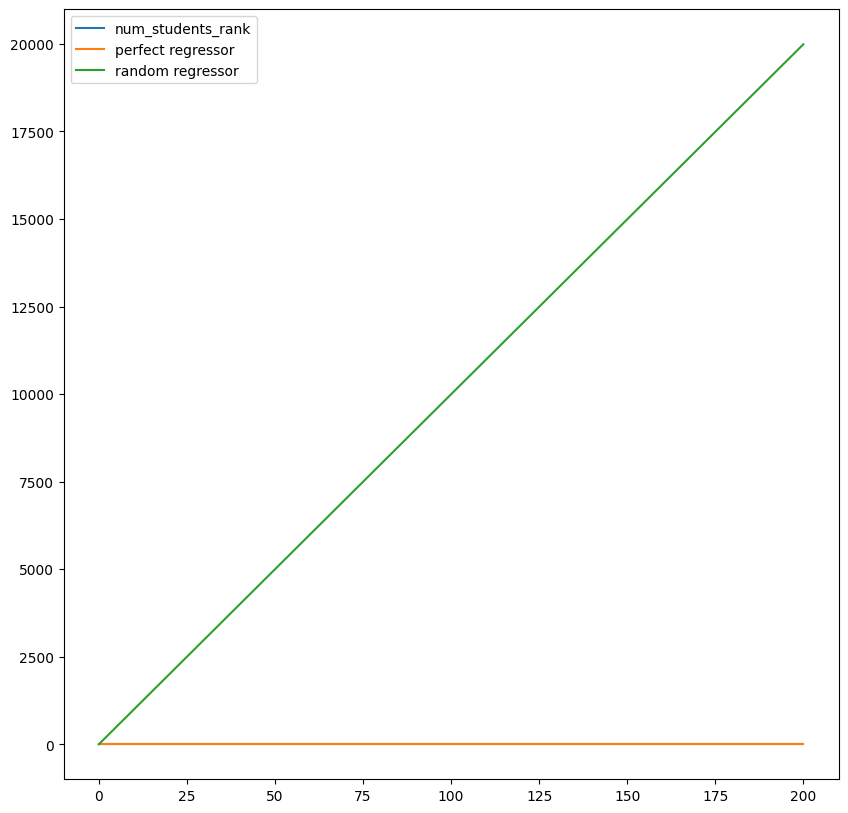

In [6]:

fig = plt.figure(figsize=(10,10))
model1_df = data.drop(columns=['research_rank', 'student_staff_ratio_rank'])
model1_df = model1_df.sort_values(by=['num_students_rank'], ascending=False)
perf = model1_df.sort_values(by=['world_rank'], ascending=False)

# Invert the world_rank so higher means better by taking reciprocal
model1_df['inv_world_rank'] = 1 / model1_df['world_rank']
perf['inv_world_rank'] = 1 / perf['world_rank']


# Compute cumulative sum of the inverted variable
model1_df['cumulative'] = [np.sum(model1_df['inv_world_rank'][0:i+1]) for i in range(len(model1_df))]
perf['cumulative'] = [np.sum(perf['inv_world_rank'][0:i+1]) for i in range(len(perf))]


cumulative = np.concatenate([np.array([0]), model1_df['cumulative'].to_numpy()])
cumulative_perf = np.concatenate([np.array([0]), perf['cumulative'].to_numpy()])
plt.step(range(len(model1_df)+1), cumulative, label='num_students_rank')
plt.step(range(len(model1_df)+1), cumulative_perf, label='perfect regressor')
plt.plot(np.array([0, 200]), np.array([0, np.sum(data['world_rank'])]), label='random regressor')
plt.legend()


The `num_students_rank` model closely follows the random regressor, indicating poor predictive power for world rankings.

## Section 2: Lift charts for all models

### Prompt 2: Plot the lift charts for models one, two and three on the same graph.

Remember to include the average classifier, the perfect classifier and a legend for your plot. Replace the `None` with your code.

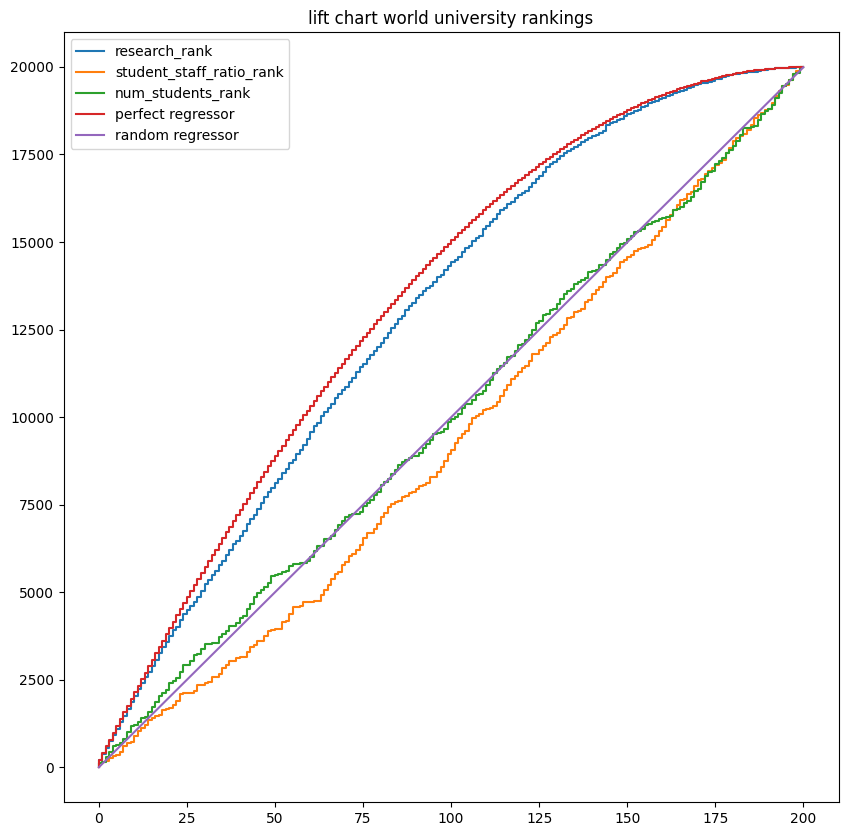

In [7]:

models = cols

fig = plt.figure(figsize=(10,10))

for model in models:

    df = data[[model, 'world_rank']]
    df = df.sort_values(by=[model], ascending=False)
    perf = df.sort_values(by=['world_rank'], ascending=False)
    df['cumulative'] = [np.sum(df['world_rank'][0:i+1]) for i in range(len(df))]
    perf['cumulative'] = [np.sum(perf['world_rank'][0:i+1]) for i in range(len(perf))]
    cumulative = np.concatenate([np.array([0]), df['cumulative'].to_numpy()])
    cumulative_perf = np.concatenate([np.array([0]), perf['cumulative'].to_numpy()])
    plt.step(range(len(df)+1), cumulative, label=model)


plt.step(range(len(cumulative_perf)), cumulative_perf, label='perfect regressor')
plt.plot(np.array([0, 200]), np.array([0, np.sum(data['world_rank'])]), label='random regressor')
plt.title('lift chart world university rankings')
plt.legend()


Among all models, research_rank performs best — its curve lies closest to the perfect regressor, while `num_students_rank` performs worst.

### Prompt 3: How does each model perform in comparison to the perfect and average regressor? Which model performs the best?

There are three models (`research_rank`, `student_staff_ratio_rank` and `num_students_rank`) in addition to `perfect regressor` and `random regressor`.


The `research_rank` model performs best, closely following the `perfect regressor`. The `num_students_rank` model performs the worst and is close to random regressor because the number of students is not a strong indicator of overall university quality or ranking.